In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-spoiler-dataset/IMDB_movie_details.json
/kaggle/input/imdb-spoiler-dataset/IMDB_reviews.json


Loading the json into dataframes

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data = pd.read_json('/kaggle/input/imdb-spoiler-dataset/IMDB_reviews.json', lines=True)

print(data.head())

num_sentences = 0
num_tokens = 0
all_tokens = []
stop_words = set(stopwords.words('english'))

        review_date   movie_id    user_id  is_spoiler  \
0  10 February 2006  tt0111161  ur1898687        True   
1  6 September 2000  tt0111161  ur0842118        True   
2     3 August 2001  tt0111161  ur1285640        True   
3  1 September 2002  tt0111161  ur1003471        True   
4       20 May 2004  tt0111161  ur0226855        True   

                                         review_text  rating  \
0  In its Oscar year, Shawshank Redemption (writt...      10   
1  The Shawshank Redemption is without a doubt on...      10   
2  I believe that this film is the best story eve...       8   
3  **Yes, there are SPOILERS here**This film has ...      10   
4  At the heart of this extraordinary movie is a ...       8   

                                  review_summary  
0  A classic piece of unforgettable film-making.  
1     Simply amazing. The best film of the 90's.  
2               The best story ever told on film  
3                     Busy dying or busy living?  
4         Great s

In [4]:
for review in data['review_text']:
    sentences = sent_tokenize(review)
    num_sentences += len(sentences)
    tokens = word_tokenize(review)
    num_tokens += len(tokens)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words and token.isalpha()]
    all_tokens.extend(filtered_tokens)

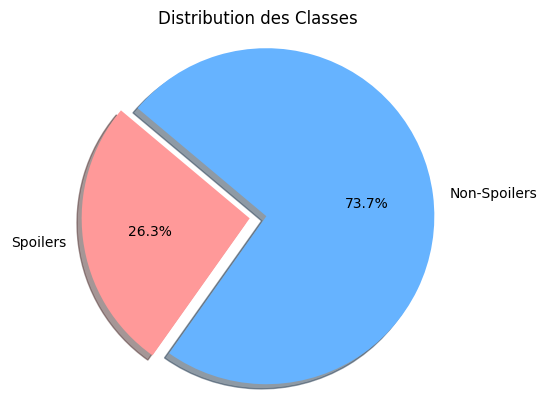

In [5]:
token_freq = Counter(all_tokens)

num_spoilers = data['is_spoiler'].sum()
num_non_spoilers = len(data) - num_spoilers
labels = ['Spoilers', 'Non-Spoilers']
sizes = [num_spoilers, num_non_spoilers]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Distribution des Classes")
plt.show()


In [6]:
num_documents = len(data)
print(f"Nombre de documents : {num_documents}")
print(f"Nombre de phrases : {num_sentences}")
print(f"Nombre de tokens : {num_tokens}")
print(f"Tokens les plus fréquents : {token_freq.most_common(10)}")
print(f"Nombre de spoilers : {num_spoilers}")
print(f"Nombre de non-spoilers : {num_non_spoilers}")


Nombre de documents : 573913
Nombre de phrases : 7044178
Nombre de tokens : 170036568
Tokens les plus fréquents : [('movie', 1379063), ('film', 1038812), ('one', 583560), ('like', 509766), ('good', 400547), ('story', 359117), ('would', 338078), ('really', 331167), ('time', 319915), ('see', 316444)]
Nombre de spoilers : 150924
Nombre de non-spoilers : 422989


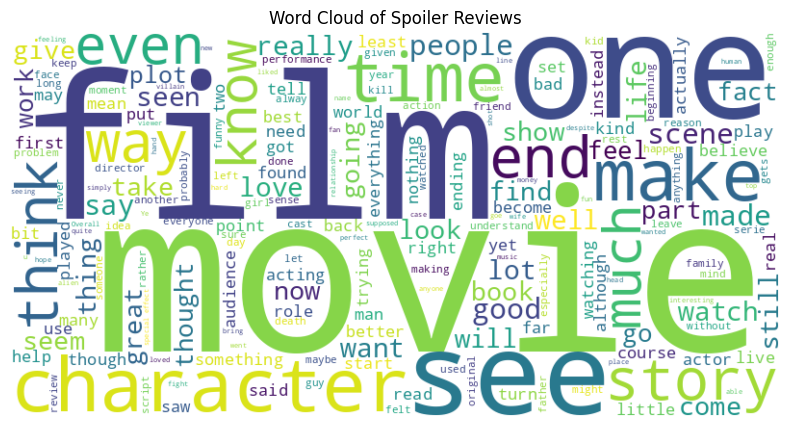

In [7]:
from wordcloud import WordCloud

spoiler_reviews = ' '.join(data[data['is_spoiler']]['review_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spoiler_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Spoiler Reviews')
plt.show()


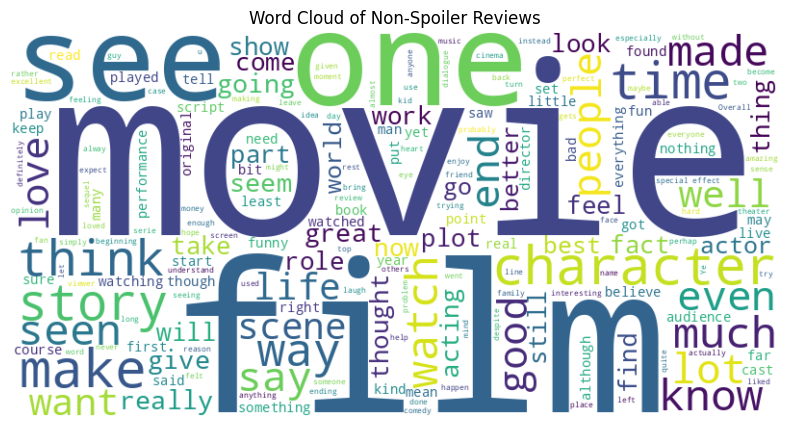

In [8]:
non_spoiler_reviews = ' '.join(data[~data['is_spoiler']]['review_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_spoiler_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Non-Spoiler Reviews')
plt.show()


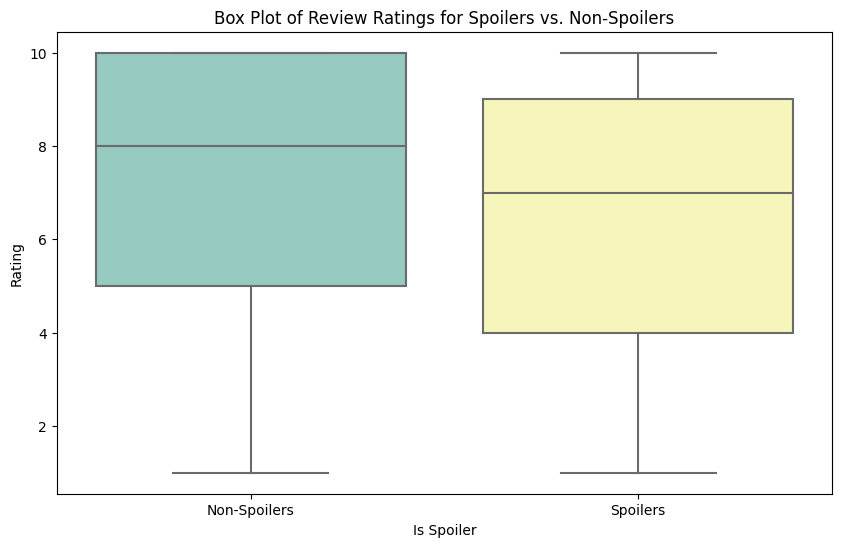

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_spoiler', y='rating', data=data, palette='Set3')
plt.title('Box Plot of Review Ratings for Spoilers vs. Non-Spoilers')
plt.xlabel('Is Spoiler')
plt.ylabel('Rating')
plt.xticks([0, 1], ['Non-Spoilers', 'Spoilers'])
plt.show()


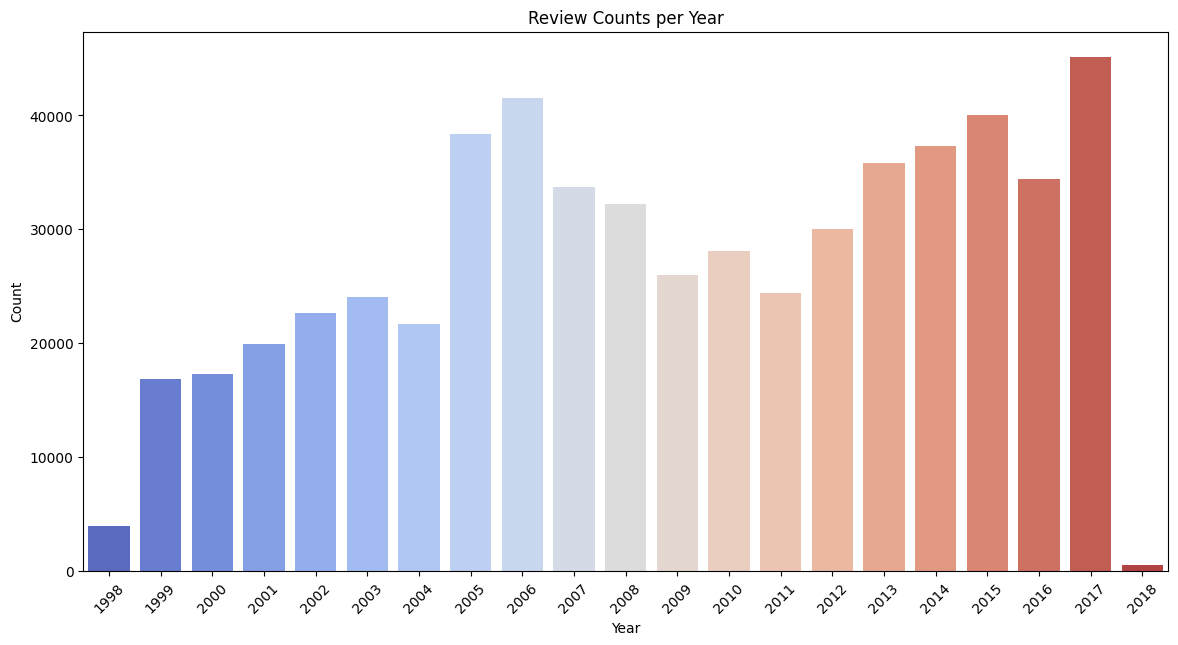

In [10]:
data['review_date'] = pd.to_datetime(data['review_date'])
data['year'] = data['review_date'].dt.year

plt.figure(figsize=(14, 7))
sns.countplot(x='year', data=data, palette='coolwarm')
plt.title('Review Counts per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

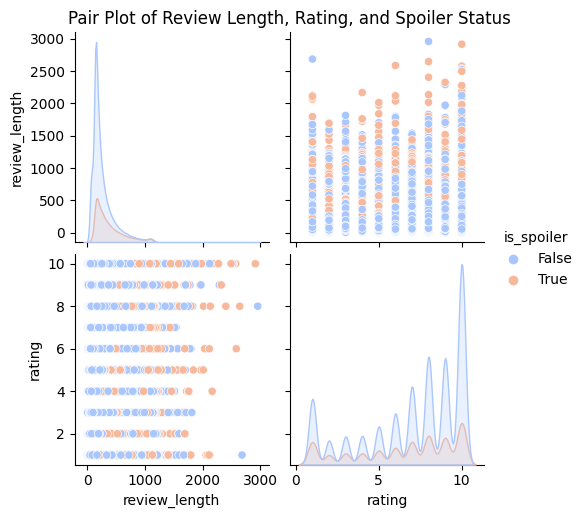

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
data['review_length'] = data['review_text'].apply(lambda x: len(word_tokenize(x)))

sns.pairplot(data[['review_length', 'rating', 'is_spoiler']], hue='is_spoiler', palette='coolwarm')
plt.suptitle('Pair Plot of Review Length, Rating, and Spoiler Status', y=1.02)
plt.show()
